** References:   **   
** 1. Thomas Haslwanter, An Introduction to Statistics with Python, 2016 **   
** 2. https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html **    
** 3. 冈和幸/堀玄, 程序员的数学2-概率统计，2015 **    
** 4. 统计学基本概念入门，网易云课堂 **    
** 5. Allen B. Downey, Think Stats, 2014**  

### 统计学基本概念 ###

#### 个体、变量和差异

**个体**：是统计分析根据研究母的所确定的最基本的研究对象单位  
**变量**：根据研究目的确定研究对象，然后对研究对象的某项目或指标进行观察或测量，这种研究项目或指标成为变量  
*变量类型*：
 - 连续变量：取值范围是一个区间，它可以在改区间中连续取值，一些特殊的变量并不能取到任意值，但仍然按连续变量处理（比如年龄）
 - 离散变量：取值范围是有限个值或者一个数列构成，表示分类情况的离散型变量又称为分类离散变量。根据类别的有序性，分类变量又分为有序分类和无序分类（比如二分类）。
 - 连续变量、有序变量、无序变量间的信息越来越少，在丢弃一部分信息量的前提下，可以将变量向信息量减少的方向变化  

**变异**：同质个体的某指标（变量）值的差异



#### 总体、样本与随机抽样

**总体**：population，是根据研究目的确定的同质所有个体某指标观察值（测量值）的集合。可以分为有限总体和无限总体。  

**样本**：从一个较大范围的研究对象中抽出的供观察（测量）的部分个体。  

**随机抽样**：在抽样研究中，随机抽出部分进行观察或测量的过程。每个个体最终是否入选在抽样进行前是不可知的，但是其入选可能性是确切可知的。  

#### 统计量、总体参数与抽样误差

**统计量**：statistic，刻画样本特征的统计指标。  

**总体参数**：parameter，刻画总体特征的指标，例如总体中某个指标的所有个体变量值的平均数成为总体平均数。  

**抽样误差**：sampling error，由随机抽样造成的样本统计量与总体指标的差异。 

**抽样分布**：虽然在一次抽样研究中的抽样误差大小随机，但是抽样误差在概率意义下有律可循，这种规律成为抽样分布。  

#### 概率、频率和小概率事件

**随机事件**：随机现象的某个可能的观察结果。  

**频率**：观察到的随机事件某个结局的出现频次或比例，可以被直接观察到。  

**概率**：刻画随机事件发生可能性的大小，取值介于0和1之间。它不能被直接观察到，但可以通过频率估计，实验次数越多，估计越精确。  

**小概率事件**：如果随机事件发生的概率小于等于0.05，则认为是一个小概率事件。   

** Note **

** 概率是一种面积，矩阵是一种映射 **  

*Monty Hall问题*  
参赛者会看见三扇关闭了的门，其中一扇的后面有一辆汽车或者是奖品，选中后面有车的那扇门就可以赢得该汽车或奖品，而另外两扇门后面则各藏有一只山羊或者是后面没有任何东西。当参赛者选定了一扇门，但未去开启它的时候，知道门后情形的节目主持人会开启剩下两扇门的其中一扇，露出其中一只山羊。主持人其后会问参赛者要不要换另一扇仍然关上的门。问题是：换另一扇门会否增加参赛者赢得汽车的机会率？

In [1]:
import random

class monty_hall:
    # 初始化变量
    def __init__(self):
        self.car_door = None
        self.opened_door = None
        self.selected_door = None
    
    # 用户随机选择一个门
    def select_door(self):
        self.selected_door = random.randint(1,3)

    # 主持人选择打开的门
    def open_door(self):
        self.opened_door = random.randint(1,3)
        while (self.opened_door ==  self.selected_door) or (self.opened_door ==  self.car_door):
            self.opened_door = random.randint(1,3)
    
    # 用户转换选择
    def change_door(self):
        self.selected_door = 6 - self.opened_door - self.selected_door
    
    # 判断用户选择的门后是否有汽车
    def is_win(self):
        if self.selected_door == self.car_door:
            return True
        else:
            return False
    
    def run(self, change_flag=True):
        self.car_door = random.randint(1,3)
        self.select_door()
        self.open_door()
        if change_flag:
            self.change_door()
        
        return self.is_win()
    
win_num, lose_num = 0, 0
total_num = 10000
mh = monty_hall()

for i in range(total_num):
    if mh.run(change_flag=True):
        win_num += 1
    else:
        lose_num += 1

print("win rate is:", win_num/total_num)

win rate is: 0.6683


#### 统计研究步骤

**设计**：
选题->明确研究目的->提出假设->明确总体范围->确定观察目标->控制研究中的偏倚->给出具体的研究方案  

**收集**：  
质量控制极其重要，garbage in, garbage out  

**整理**：  
越来越倾向于半自动化

**分析**：   
**统计描述**：尽量精确、直观而全面的对获得的样本进行呈现，比如使用统计图、统计报表。  
**统计推断**：从样本信息外推到总体，以最终获得对所感兴趣问题的解答。   
- 参数估计：样本->总体特征   
- 假设检验：指标可能的影响因素分析   

### 连续随机变量的统计描述

#### 均数

**优点**：  
- 使大量观测数据转换为一个代表性数值
- 直观便于理解传播

**缺点**：   
- 掩盖了各个观测数据之间的差异性  
- 对个别极端值反应比较灵敏  

**使用范围**：  
- 对称分布，特别是正态分布

In [2]:
import numpy as np

x = [10, 20, 30, 20, 5000]
print(np.mean(x))

xWithNan = np.r_[x, np.nan]
print(np.mean(xWithNan))
print(np.nanmean(xWithNan))

a = 3
y1 = a * x
print(y1)
print(np.mean(y1))

y2 = np.array(a) * x
print(y2)
print(np.mean(y2))

z = np.array(x) + 4
print(np.mean(z))

1016.0
nan
1016.0
[10, 20, 30, 20, 5000, 10, 20, 30, 20, 5000, 10, 20, 30, 20, 5000]
1016.0
[   30    60    90    60 15000]
3048.0
1020.0


#### 中位数

中位数：将全体数据按大小顺序排列，在这个数列中处于中间位置的那个值。  

**优点**：  
- 它是位置平均数，不受极端值的影响。在具有个别极端值的数列中，中位数比算数平均数更具代表性。

**缺点**：    
- 相对均数难以理解
- 当样本数比较小的时候，中位数不稳定

In [3]:
x = [10, 20, 30, 20, 5000]

print(np.median(x))

20.0


#### 其他

**几何均数**：  
- 对各变量值的连乘积开项数次方根
- 适用于具有等比或近似等比关系的数据

**众数**：   
- 是一组数据中出现次数最多的数值
- 对非数值统计比较有用，由于非数值数据无法良好定义算术平均数和中位数

**截尾均数**：  
- 数据进行行排序后，按照一定比例去掉最两端的数据，只使用中部的数据来计算出得均数

In [4]:
from scipy import stats

x = [10, 20, 30, 20, 30, 40, 5000]

print(stats.mode(x))

import pandas as pd

print(pd.Series(x).mode())

import warnings
warnings.filterwarnings('ignore')

print(stats.trim_mean(x, 0.25))
print(stats.trim_mean(x, 0.05))

ModeResult(mode=array([20]), count=array([2]))
0    20
1    30
dtype: int64
28.0
735.7142857142857


#### 全距

全距：序列中最大值与最小值之间的差距

In [5]:
x = [10, 20, 30, 20, 30, 40, 5000]

# ptp stands for “peak-to-peak.”
print(np.ptp(x))

4990


#### 方差和标准差

**离均差**：
个体对群体平均值的距离

**方差**：  
每个样本值与样本值的平均数之差的平方值的平均数（无偏估计）：   
$\sigma ^ { 2 } = \sum ( X - \mu ) ^ { 2 } / n$   
实际工作中，总体均数难以得到时，应用样本统计量代替总体参数，经校正后，样本方差计算公式（有偏估计）：   
$s ^ { 2 } = \frac { 1 } { n - 1 } \sum _ { i = 1 } ^ { n } ( X - \overline { X } ) ^ { 2 }$

**标准差**：
又常称均方差（无偏估计），是离均差平方的算术平均数的平方根：  
$\sigma = \sqrt { \sum ( X - \mu ) ^ { 2 } / n }$   
实际工作中，总体均数难以得到时，应用样本统计量代替总体参数，经校正后，样本标准差计算公式（有偏估计）：    
$S = \sqrt { \sum ( X - \overline { X } ) ^ { 2 } / ( n - 1 ) }$   

**变异系数**：   
原始数据标准差与原始数据平均数的比，它消除测量尺度和量纲的影响：   
$c _ { v } = { \sigma } / { \mu }$   

方差-标准差-变异系数适用于对称分布，本质上只适用于正态分布的数据。

In [6]:
x = [10, 20, 30, 20, 30, 40, 5000]

print(np.var(x))
print(np.std(x))
# ddof : 自由度。The divisor used in calculations is N - ddof, where N represents the number of elements. By default ddof is zero.
print(np.std(x, ddof=0))
print(np.std(x, ddof=1))
print(np.std(x)/np.mean(x))

3030767.3469387754
1740.9099192487747
1740.9099192487747
1880.3976276562462
2.366285327134257


#### 百分位数

**百分位数**：
如果将一组数据从小到大排序，并计算相应的累计百分位，则某一百分位所对应数据的值就称为这一百分位的百分位数。它适用于各种分布。   

**四分位数**：
把所有数值由小到大排列并分成四等份，处于三个分割点位置的数值：P25，P50，P75。   

In [7]:
x = [10, 20, 30, 20, 30, 40, 5000]

print(np.percentile(x, [0, 25, 50, 75, 95]))

[  10.   20.   30.   35. 3512.]


#### 分布

**偏度(skewness)系数**：描述分布偏离对称性程度的一个特征数。当分布左右对称时，偏度系数为0。当偏度系数大于0时，即重尾在右侧时，该分布为右偏。当偏度系数小于0时，即重尾在左侧时，该分布左偏。   
**峰度(kurtosis)系数**：描述概率密度分布曲线在平均值处峰值高低的特征数。

### 分类变量的统计描述

#### 基本的描述方式

- 频数列表  
- 百分比  
- 累计频数  
- 累计百分比  
- 众数  

In [8]:
x = [10, 20, 30, 20, 30, 40, 5000]

unique_elements, counts_elements = np.unique(x, return_counts=True)
for u, c in zip(unique_elements, counts_elements):
    print(u, c, c/sum(counts_elements))
    
print(np.cumsum(counts_elements))
print(np.cumsum(counts_elements)/sum(counts_elements))
print(pd.Series(x).mode())

10 1 0.14285714285714285
20 2 0.2857142857142857
30 2 0.2857142857142857
40 1 0.14285714285714285
5000 1 0.14285714285714285
[1 3 5 6 7]
[0.14285714 0.42857143 0.71428571 0.85714286 1.        ]
0    20
1    30
dtype: int64


#### 比（ratio）和率（rate）

**比（ratio）**：任意两个变量之比，这两个变量可以是性质相同的也可以是性质不同的，一般这两个变量的比值必须有专业意义。   
**构成比（proportion）**：部分占总体的比例，各部分构成比之和为1。   
**率（rate）**：某个时期内某个事件发生的频率或强度，比如发病率，成功率。

In [9]:
x = [10, 20, 30, 20, 30, 40, 5000]
y = [15, 30, 50, 20, 40, 100, 6000]

print(np.array(x)/np.array(y))

[0.66666667 0.66666667 0.6        1.         0.75       0.4
 0.83333333]


### 正态分布

#### 概率即面积

**概率密度函数（probability density function）**：连续型随机变量的概率密度函数（在不至于混淆时可以简称为密度函数）是一个描述这个随机变量的输出值，在某个确定的取值点附近的可能性的函数。本身不是概率，取值积分后才是概率。    

**累计概率**：概率密度曲线下的面积。   

**概率质量函数（probability mass function)**：概率质量函数是离散随机变量在各特定取值上的概率。   

- PDF是连续变量特有的，PMF是离散随机变量特有的；
- PDF的取值本身不是概率，它是一种趋势（密度）只有对连续随机变量的取值进行积分后才是概率，也就是说对于连续值确定它在某一点的概率是没有意义的；
- PMF的取值本身代表该值的概率。

** 其他相关函数 **    
- **Probability density function (PDF)**:    
Note that to obtain the probability for the variable appearing in a certain interval, you have to integrate the PDF over that range.    
Example: What is the chance that a man is between 160 and 165 cm tall?      

- **Cumulative distribution function (CDF)**:    
Gives the probability of obtaining a value smaller than the given value.    
Example: What is the chance that a man is less than 165 cm tall?    

- **Survival Function SF = 1-CDF**:    
Gives the probability of obtaining a value larger than the given value. It can also be interpreted as the proportion of data “surviving” above a certain value.    
Example: What is the chance that a man is larger than 165 cm?    

- **Percentile Point Function (PPF)**:    
The inverse of the CDF. The PPF answers the question “Given a certain probability, what is the corresponding input value for the CDF?”      
Example: Given that I am looking for a man who is smaller than 95% of all other men, what size does the subject have to be?     

- **Inverse Survival Function (ISF)**:    
The name says it all.      
Example: Given that I am looking for a man who is larger than 95% of all other
men, what size does the subject have to be?    

- **Random Variate Sample (RVS)**:     
Random variates from a given distribution. (A variable is the general type, a variate is a specific number.)



0.9750021048517795
0.024997895148220435
1.959963984540054
-1.959963984540054
0.024997895148220435
0.9750021048517795
-1.9599639845400545
1.9599639845400545


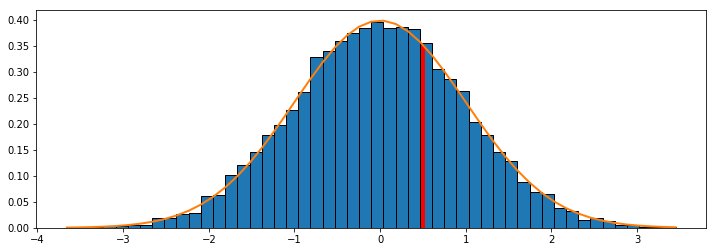

In [10]:
import matplotlib.pyplot as plt
% matplotlib inline

rv = stats.norm(0, 1)
y = stats.norm.rvs(0, 1, 10000)

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)
n, bins, ignored = ax.hist(y, 50, normed=True, edgecolor='k')
ax.plot(bins, 1/(np.sqrt(2*np.pi))*np.exp(-(bins)**2/(2)), lw=2.0);
plt.vlines(0.5, 0, rv.pdf(0.5), colors='red', lw=4.0);

print(rv.cdf(1.96))
print(rv.sf(1.96))
print(rv.ppf(0.975))
print(rv.isf(0.975))

print(rv.cdf(-1.96))
print(rv.sf(-1.96))
print(rv.ppf(0.025))
print(rv.isf(0.025))

#### 正态分布

**正态分布**：   
- 记为$X \sim N \left( \mu , \sigma ^ { 2 } \right)$
- 概率密度函数：$f ( x ) = \frac { 1 } { \sigma \sqrt { 2 \pi } } e ^ { - \frac { ( x - \mu ) ^ { 2 } } { 2 \sigma ^ { 2 } } }$
- $\mu$是分布缺陷的峰位置，又称为位置参数   
- $\sigma$越大离散程度越大，又称为形状参数   

**标准正态分布**   
均值为0，标准差为1的正态分布N(0,1)。   
- 如果$X \sim N \left( \mu , \sigma ^ { 2 } \right)$，则$y = \frac { X - \mu } { \sigma } \sim N ( 0,1 )$


5.0 3.0 9.0


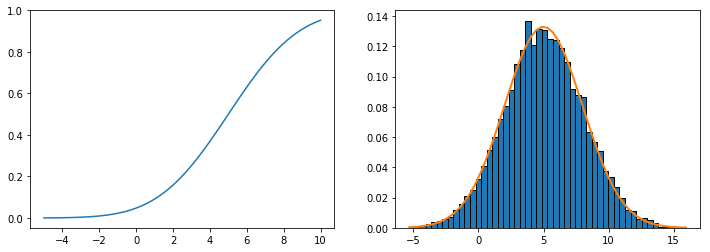

In [11]:
n_d = stats.norm(5,3)
print(n_d.mean(), n_d.std(), n_d.var())
x = np.linspace(-5, 10, 101)
y = n_d.cdf(x)

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.plot(x, y);

ax2 = fig.add_subplot(122)
fx = stats.norm.rvs(5, 3, 10000)
# edgecolor指定bin的边框： https://stackoverflow.com/questions/43080259/no-outlines-on-bins-of-matplotlib-histograms-or-seaborn-distplots
# bins返回的是x轴bin的坐标列表
n, bins, ignored = ax2.hist(fx, 50, normed=True, edgecolor='k')
ax2.plot(bins, 1/(3*np.sqrt(2*np.pi))*np.exp(-(bins-5)**2/(2*3**2)), lw=2.0);

### 二项分布

**伯努利试验**：是在**同样的条件下**重复地、**相互独立地**进行的一种随机试验，其特点是该随机试验只有两种可能结果：发生或者不发生。单个伯努利试验是没有多大意义的，然而，当我们反复进行伯努利试验，去观察这些试验有多少是成功的，多少是失败的，事情就变得有意义了。   

**二项分布**：是指n个独立的是/非试验中成功的次数的离散概率分布，其中每次试验的成功概率为p。当n=1时，二项分布就是伯努利分布。   
- 二项分布是离散分布   
- 概率分布：$b ( x , n , p ) = C _ { n } ^ { x } p ^ { x } q ^ { n - x }$，b表示二项分布的概率，n表示试验次数，x表示出现某个结果的次数，p是事件出现的概率。   
- 均值为np，方差为np(1-p)

0.7
0.3
[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0
 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0]
6.0
4.199999999999999


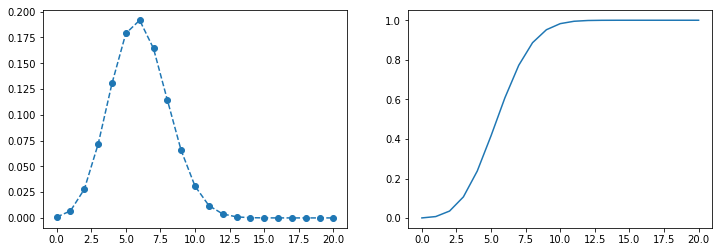

In [12]:
# 伯努利试验
p = 0.3
bernoulli_dist = stats.bernoulli(p)
print(bernoulli_dist.pmf(0))
print(bernoulli_dist.pmf(1))
print(bernoulli_dist.rvs(100))


## 二项分布
p, num = 0.3, 20
binomal_dist = stats.binom(num, p)
binomal_pmf = binomal_dist.pmf(np.arange(0, num+1))
binomal_cdf = binomal_dist.cdf(np.arange(0, num+1))

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.plot(binomal_pmf, ls='--', marker='o')
ax2 = fig.add_subplot(122)
ax2.plot(binomal_cdf);

print(binomal_dist.mean())
print(binomal_dist.var())

### 参数估计和置信区间

**统计推断(statistical inference)**：根据带随机性的观测数据（样本）以及问题的条件和假定（模型），而对未知事物作出的，以概率形式表述的推断。统计推断的基本问题可以分为两大类：一类是参数估计问题；另一类是假设检验问题。

#### 大数定律和中心极限定理

**大数定律**：  
对于服从独立同分布的随机变量，其均值（是个随机变量）收敛于这个分布的期望。  

**中心极限定理**：   
对于大量相互独立的随机变量，其均值（是个随机变量）的**分布**逼近于某个正态分布（这个正态分布的期望和上面那个期望是相同的）。

假设有n个独立随机变量，它们的和为：  
$$S _ { n } = \sum _ { i = 1 } ^ { n } X _ { i }$$   
大数定律；    
$$\frac { 1 } { n } S _ { n } - E ( X ) \stackrel { P } { \rightarrow } 0$$
中心极限定理：    
$$\sqrt { n } \left( \frac { S _ { n } } { n } - E ( X ) \right) \stackrel { D } { \rightarrow } N ( 0 , \Sigma )$$

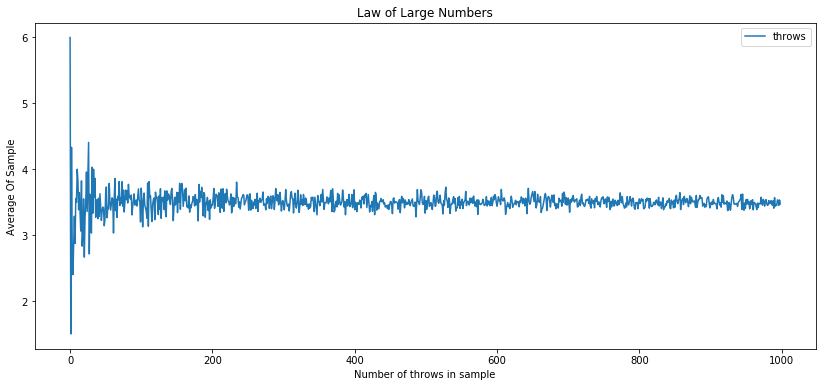

In [13]:
# 掷骰子模拟大数定律
results = []
for n_throws in range(1,1000):
    throws = np.random.randint(low=1, high=7, size=n_throws)
    mean_of_throws = throws.mean()
    results.append(mean_of_throws)

df = pd.DataFrame({ 'throws' : results})

ax = df.plot(title='Law of Large Numbers', figsize=(14,6))
ax.set_xlabel("Number of throws in sample")
ax.set_ylabel("Average Of Sample");

0.10137789395007493 0.010380534267442513


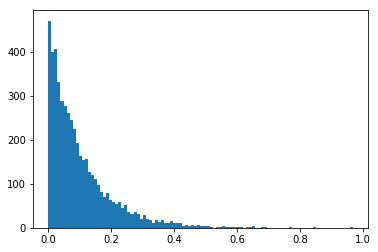

In [14]:
# 使用指数分布模拟中心极限定理
lam = 0.1
data = np.random.exponential(lam, 5000)
print(data.mean(), data.var())
plt.hist(data, bins=100);

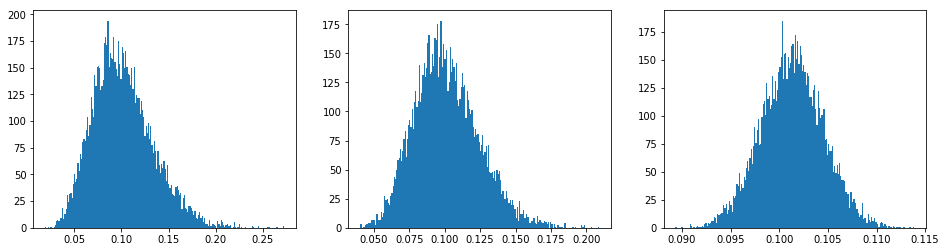

In [15]:
sample10_mean = []
sample20_mean = []
sample1000_mean = []

for _ in range(10000):
    sample10 = np.random.choice(data, 10)
    sample10_mean.append(sample10.mean())
    sample20 = np.random.choice(data, 20)
    sample20_mean.append(sample20.mean())
    sample1000 = np.random.choice(data, 1000)
    sample1000_mean.append(sample1000.mean())

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
axes[0].hist(sample10_mean, bins=200)
axes[1].hist(sample20_mean, bins=200)
axes[2].hist(sample1000_mean, bins=200);

#### 抽样误差与标准误差

**抽样误差**：在具体的抽样调查中，由于随机因素引起的样本指标与总体指标之间的离差。由于总体指标无法取得，所以抽样误差无法直接计算。  

**标准误差**：对一个总体多次抽样，每次样本大小都为n，那么每个样本都有自己的平均值，这些平均值的标准差叫做标准误差。 
$$S E M = \frac { \sigma } { \sqrt { n } } = \sqrt { \frac { \sum _ { i = 1 } ^ { n } \left( x _ { i } - \overline { x } \right) ^ { 2 } } { n - 1 } } \cdot \frac { 1 } { \sqrt { n } }$$   

**标准差(SD)**是一次抽样中个体间的离散程度，反映了个体对样本均值的代表性，衡量的是该随机变量的离散度，用于描述统计。     

**标准误差(SEM)**是多次抽样中样本均值间的离散程度，反映了样本均值对总体均值的代表性，衡量的是抽样分布的离散度，用于推论统计。  

**t分布**：
现实情况下，总体标准差往往是无法获取的，一般是通过样本标准差s估计，于是标准误的估计公式变为：   
$$\frac { S } { \sqrt { n } }$$   
如果使用总体标准差进行计算，则：$\frac { \overline { X } - \mu } { \sigma / \sqrt { n } }$服从正态分布。    
但是由于一般只能使用样本标准差进行估计，则：$\frac { \overline { X } - \mu } { S / \sqrt { n } }$服从的是t分布。

In [16]:
x = np.random.normal(5, 3, 1000)
print('%.2f' % np.std(x))
print('%.2f' % (np.std(x)/np.sqrt(1000)))
print('%.2f' % stats.sem(x))

3.06
0.10
0.10


#### 置信区间

**大样本**：  
样本大小（n>=30）时，抽样分布近似正态分布。

**小样本**：  
样本大小（n<30）时，抽样分布符合t分布。

**点估计**：   
用一个数据的函数（通常称为估计统计量）来给出一个未知参数的估计值   

**区间估计**：  
在点估计的基础上，给出总体参数估计的一个区间范围，该区间通常由样本统计量加减估计误差得到。    

**置信区间**：
对样本的总体的参数分布中的某一个未知参数值，以区间形式给出的估计。  

在置信区间中，总体参数虽未知，但却是固定的值，而不是随机变量值，其大小与抽样无关。因此，95%置信区间不能理解为：总体参数有95%的可能落在该区间内，因为相应的总体参数只有一个。正确的理解是：**样本数目不变的情况下，做一百次试验，有95个置信区间包含了总体真值。置信度为95%**

**置信区间计算方法**：   
https://zhuanlan.zhihu.com/p/35389951

In [17]:
rv = stats.norm(0, 1)
y = stats.norm.rvs(0, 1, 10000)

print(rv.cdf(1.96))
print(rv.sf(1.96))
print(rv.ppf(0.975))
print(rv.isf(0.975))

print(rv.cdf(-1.96))
print(rv.sf(-1.96))
print(rv.ppf(0.025))
print(rv.isf(0.025))

# 置信区间
print(rv.interval(0.95))

0.9750021048517795
0.024997895148220435
1.959963984540054
-1.959963984540054
0.024997895148220435
0.9750021048517795
-1.9599639845400545
1.9599639845400545
(-1.959963984540054, 1.959963984540054)


### 假设检验

#### 假设检验的基本原理

**前提条件**：
- 运用统计知识根据研究设计和资料性质正确选择分析过程    
- 初步统计分析和统计描述：    
  -- 集中趋势、离散趋势、分布特征、异常值和其他
  
**假设检验**：  
推论统计中用于检验统计假设的一种方法

**基本原理**：  
- 小概率事件在一次随机抽样中不会发生。   
- 先对总体做出某种假设，然后对总体进行抽样得到样本，通过检验样本是否是在总体假设下的小概率事件，如果是小概率事件就可以推翻原来的假设了，如果不是小概率事件，暂时不能推翻这个假设，可以做进一步的检验，或者接受假设。   

#### 假设检验的基本步骤

**1. 建立假设检验，确定检验水准**     
H0和H1假设都是对总体特征的检验假设，相互联系且对立。    
- *无效/零假设H0*：总是假设样本差别来自抽样误差。  
- *备择假设H1*：是来自非抽样误差，有单双侧之分。   
- *检验水准*$\alpha$：指假设H0本来成立，却根据样本信息拒绝了H0的可能性的大小，即拒绝了H0实际上成立的概率。一般$\alpha$取值为0.05。    

**2. 计算检验统计量和P值**：   
- 统计量一般服从某种一直分布，从而可以计算出概率P值（P是从H0假设的总体中抽出现有样本以及更极端情况的概率）。   
- 各种检验方法所利用的分布及计算原理不同，从而检验统计量也不同。常用的统计量分布包括：t分布，卡方分布，F分布等等。  

**3. 得出推断结论**：   
- 如果P≤$\alpha$，拒绝H0，接受H1，可以认为样本与总体的差别不仅仅是抽样误差造成的，而是可能存在本质上的差别，因此可以认为两者的差别有统计学意义或是显著性的。   
- 如果P>$\alpha$，按$\alpha$＝0.05水准，不拒绝H0，可以认为样本和总体间的差别態排除纯粹由抽样误差造成的，即无统计学意义或显著性差异。注意，这里不拒绝H0不等于接受H0。   

In [18]:
# 掷硬币模拟假设假设检验
# 假设掷硬币100次，其中60次为正面，40次为反面
# H0：硬币没有问题，即正反面次数分别为50次；H1：硬币有问题
# 掷硬币的分布为二项分布B（100,0.5）
distr = stats.binom(100, 0.5)
print('掷骰子100次，大于60次为正面的概率为 {:.2f}'.format(distr.sf(60)))
# 掷硬币100次，大于等于60次为正面的概率为0.02小于0.05，拒绝H0，接受H1，说明骰子有问题。

掷骰子100次，大于60次为正面的概率为 0.02


#### 一类错误和二类错误

|          | 拒绝H0，接受H1 | 不拒绝H0 |
|:---------------:|:---------:|:---------:|
| H0真实      |$\alpha$（一类错误）       |$1-\alpha$ |
| H0不真实      | $1-\beta$       |    $\beta$（二类错误）      |


更多细节： https://www.zhihu.com/question/60368894/answer/175474713    

**检验效能**：H1为真，实际拒绝H0的概率，$1-\beta$。   
- 样本量太小，会导致检验效能不足，从而可能无法检出可能存在的差异。    
- 样本量太大，得出的有统计学意义的结论可能根本没有实际意义。   

**控制两种错误的方法**：   
- $\alpha$可以通过事先认为设定，希望拒绝结论更可信，可以减小$\alpha$的值。    
- $\beta$只能间接控制：   
-- 增大样本量以减小标准误   
-- 放大$\alpha$来减小$\beta$   

#### 常用的假设检验方法

**单侧检验**：   
当要检验的是样本所取自的总体的参数值大于或小于某个特定值时，所采用的一种单方面的统计检验方法。

**双侧检验**：  
当要检验的是样本所取自的总体的参数值有没有显著差异，而不管差异是正还是负时，所采用的一种统计检验方法。



##### 单样本t检验

**单样本t检验**：  
检验一个正态分布的总体的均值是否在满足零假设的值之内。只要数据分布不存在强烈的偏态，一般而言，单样本t检验都是适用的。

统计量：
$$t = \frac { \overline { x } - \mu _ { 0 } } { s / \sqrt { n } }$$     
其中$i = 1 \ldots n , \overline { x } = \frac { \sum _ { i = 1 } ^ { n } x _ { i } } { n }$为样本平均数，$s = \sqrt { \frac { \sum _ { i = 1 } ^ { n } \left( x _ { i } - \overline { x } \right) ^ { 2 } } { n - 1 } }$为样本标准偏差，n为样本数。该统计量t在零假说：$\mu = \mu _ { 0 }$为真的条件下服从自由度为n−1的t分布。   

H0: 样本均数与（假定的）总体均数的差异完全是由抽样误差造成的。   
H1：样本均数与总体均数的差异反映了两个总体均数确实存在误差。  
检验水准：$\alpha=0.05$     
如果统计量计算出来的P值小于等于$\alpha$，则拒绝H0，接受H1，否则不拒绝H0。   

In [19]:
np.random.seed(1) 
rvs = stats.norm.rvs(loc=5, scale=10, size=100)
t_statistics_1, p_value_1 = stats.ttest_1samp(rvs, 5.0)
t_statistics_2, p_value_2 = stats.ttest_1samp(rvs, 3.0)

print(t_statistics_1, t_statistics_2)
print(p_value_1, p_value_2)  # p2<0.05，拒绝H0

0.6810004356008288 2.9291627860623533
0.49746099844105407 0.004218683146020625


##### 两样本t检验

**两样本t检验**：   
来自两个总体的独立样本，推断两个总体的均值是否存在显著差异。 

统计量：
$$t = \frac { \overline { x } _ { 1 } - \overline { x } _ { 2 } } { s _ { \overline { x } _ { 1 } - \overline { x } _ { 2 } } }$$

H0：$\mu _ { 1 } = \mu _ { 2 }$    
H1：$\mu _ { 1 } \neq \mu _ { 2 }$    
检验水准：$\alpha=0.05$   

**适用条件**：   
独立性、正态性和方差齐性   

In [20]:
np.random.seed(12345678)

rvs1 = stats.norm.rvs(loc=5, scale=10, size=500)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500)
# rvs3 = stats.norm.rvs(loc=5, scale=20, size=500)
# rvs4 = stats.norm.rvs(loc=5, scale=20, size=100)
# rvs5 = stats.norm.rvs(loc=8, scale=20, size=100)
rvs5 = stats.norm.rvs(loc=8, scale=10, size=500)

t_statistics_12, p_value_12 = stats.ttest_ind(rvs1, rvs2)
# t_statistics_13, p_value_13 = stats.ttest_ind(rvs1, rvs3)
# t_statistics_14, p_value_14 = stats.ttest_ind(rvs1, rvs4)
t_statistics_15, p_value_15 = stats.ttest_ind(rvs1, rvs5)

print(t_statistics_12, t_statistics_15)
print(p_value_12, p_value_15)

0.26833823296238857 -5.043401345858523
0.788494433695651 5.43029794754431e-07


##### 卡方检验

**卡方检验**：   
一种分类统计推断方法，统计量的分布在零/无效假设成立时近似服从卡方分布（$X ^ { 2 }$分布）的假设检验。在没有其他的限定条件或说明时，卡方检验一般指代的是皮尔森卡方检验。   

假设实验中从总体中随机取样得到的n个观察值被划分为k个互斥的分类，这样每个分类都有一个对应的实际观察次数$x _ { i } ( i = 1,2 , \dots , k )$。研究人员会对实验中各个观察值落入第i个分类的概率$\boldsymbol { p } _ { i }$的分布提出无效假设，从而获得了对应所有第i分类的理论期望次数$m _ { i } = n p _ { i }$以及限制条件：   
$\sum _ { i = 1 } ^ { k } p _ { i } = 1 以及\sum _ { i = 1 } ^ { k } m _ { i } = \sum _ { i = 1 } ^ { k } x _ { i } = n$    
在上述无效假设成立以及n趋向$\infty$的时候，以下统计量的极限分布趋向$X ^ { 2 }$分布（统计量）：    
$X ^ { 2 } = \sum _ { i = 1 } ^ { k } \frac { \left( x _ { i } - m _ { i } \right) ^ { 2 } } { m _ { i } } = \sum _ { i = 1 } ^ { k } \frac { x _ { i } ^ { 2 } } { m _ { i } } - n$

H0：观察频数与期望频数没有区别    
H1：观察频数与期望频数有区别    
检验水准：$\alpha=0.05$   

In [21]:
# scipy.stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0), Calculate a one-way chi square test.
# f_exp : Expected frequencies in each category. By default the categories are assumed to be equally likely.
obs1 = np.array([25,25,25,25,20,25])
chi1 = stats.chisquare(obs1)
print(chi1)

# scipy.stats.chi2_contingency(observed, correction=True, lambda_=None), Chi-square test of independence of variables in a contingency table.
obs2 = np.array([[50, 20, 20], [20, 20, 20]])
chi2 = stats.chi2_contingency(obs2)
print(chi2)

Power_divergenceResult(statistic=0.8620689655172413, pvalue=0.9729066489231879)
(7.142857142857142, 0.028115659748972056, 2, array([[42., 24., 24.],
       [28., 16., 16.]]))
